# **Data Handling**

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = r'C:\Users\highz\Downloads\datasetfolder\facial_expressions'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Creating data generators with appropriate arguments
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalizing the pixel values
    rotation_range=20, # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2, # Randomly translate images horizontally (as a fraction of total width)
    height_shift_range=0.2, # Randomly translate images vertically (as a fraction of total height)
    shear_range=0.2, # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2, # Randomly zoom in on images
    horizontal_flip=True, # Randomly flip images horizontally
    fill_mode='nearest' # Fill pixels in the input boundaries with the nearest valid pixel
)

validation_datagen = ImageDataGenerator(rescale=1./255) # Only rescale for validation data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 26369 images belonging to 7 classes.
Found 9518 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

num_classes = 7

# Load the ResNet50 model with pre-trained weights, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,693,063 (98.01 MB)

 Trainable params: 25,639,943 (97.81 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


C:\Users\highz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


825/825 ━━━━━━━━━━━━━━━━━━━━ 2422s 3s/step - accuracy: 0.2839 - loss: 1.8237 - val_accuracy: 0.2709 - val_loss: 2.4729
Epoch 2/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 2973s 4s/step - accuracy: 0.4615 - loss: 1.3774 - val_accuracy: 0.2382 - val_loss: 1.7462
Epoch 3/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 2304s 3s/step - accuracy: 0.5077 - loss: 1.2784 - val_accuracy: 0.4747 - val_loss: 1.3605
Epoch 4/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 2299s 3s/step - accuracy: 0.5339 - loss: 1.1931 - val_accuracy: 0.3222 - val_loss: 1.9369
Epoch 5/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 2303s 3s/step - accuracy: 0.5595 - loss: 1.1444 - val_accuracy: 0.3508 - val_loss: 2.0898
Epoch 6/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 2319s 3s/step - accuracy: 0.5705 - loss: 1.1100 - val_accuracy: 0.1543 - val_loss: 2.5264
Epoch 7/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 2317s 3s/step - accuracy: 0.5846 - loss: 1.0855 - val_accuracy: 0.4362 - val_loss: 1.3974
Epoch 8/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 2314s 3s/step - accuracy: 0.6003 - loss: 1.0459 - val_accurac

In [ ]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model.fit(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5
825/825 ━━━━━━━━━━━━━━━━━━━━ 2638s 3s/step - accuracy: 0.6589 - loss: 0.8959 - val_accuracy: 0.6040 - val_loss: 1.0973
Epoch 2/5
825/825 ━━━━━━━━━━━━━━━━━━━━ 2602s 3s/step - accuracy: 0.6579 - loss: 0.8987 - val_accuracy: 0.6120 - val_loss: 1.0872
Epoch 3/5
825/825 ━━━━━━━━━━━━━━━━━━━━ 2627s 3s/step - accuracy: 0.6682 - loss: 0.8876 - val_accuracy: 0.6098 - val_loss: 1.0916
Epoch 4/5
825/825 ━━━━━━━━━━━━━━━━━━━━ 2600s 3s/step - accuracy: 0.6622 - loss: 0.8856 - val_accuracy: 0.6093 - val_loss: 1.0914
Epoch 5/5
825/825 ━━━━━━━━━━━━━━━━━━━━ 2763s 3s/step - accuracy: 0.6665 - loss: 0.8712 - val_accuracy: 0.6158 - val_loss: 1.0744


In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy*100:.2f}%")

298/298 ━━━━━━━━━━━━━━━━━━━━ 204s 683ms/step - accuracy: 0.6158 - loss: 1.0731
Validation Loss: 1.0744
Validation Accuracy: 61.58%


# **Evaluating The Model**

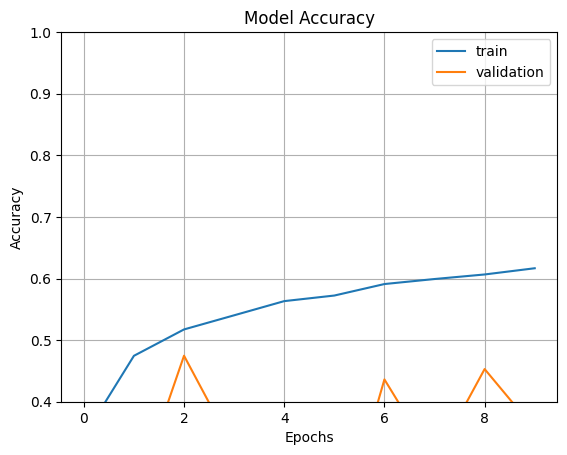

In [ ]:
import matplotlib.pyplot as plt
fig1= plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()